In [20]:
import pandas as pd
import numpy as np
import seaborn as sns

In [244]:
df_identity = pd.read_csv('datasets/train_identity.csv')
df_transaction = pd.read_csv('datasets/train_transaction.csv')

In [245]:
df_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [246]:
df_transaction.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.00000,82351.000000,82351.000000,82351.000000,82351.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,4.727971,6217.223583,11169.275702,7955.735482,243.861391,387.62948,274.576920,668.486833,1095.034387,814.946722
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,0.000000,0.000000,25.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,55.000000,160000.000000,160000.000000,160000.000000,55125.000000,55125.00000,55125.000000,104060.000000,104060.000000,104060.000000


In [247]:
df = pd.merge(df_transaction, df_identity, on="TransactionID")

In [248]:
df.shape

(144233, 434)

In [249]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pandas as pd

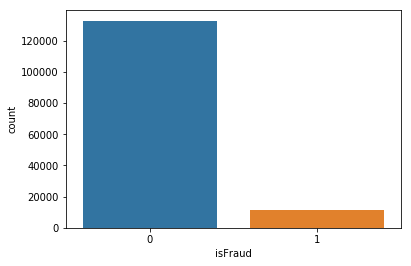

In [29]:
sns.countplot(df['isFraud'])

In [274]:
features = ['TransactionAmt'] + ['V%d' % number for number in range(19, 20)]

In [275]:
target = 'isFraud'

In [276]:
X = df[features]
y = df[target]

In [277]:
X.head()

,TransactionAmt,V19
0,50.000,NaN
1,15.000,NaN
2,75.887,1.0
3,16.495,1.0
4,30.000,NaN


In [265]:
X.describe()

,TransactionAmt,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,144233.000000,69181.000000,69181.000000,69181.000000,69181.000000,69181.000000,69181.000000,69181.000000,69181.000000,69181.000000,69181.000000
mean,83.554533,0.911030,0.917116,0.961912,0.980732,1.074891,1.083679,0.968170,0.975080,0.005739,0.006143
std,99.850258,0.319081,0.360141,0.226804,0.350470,0.478007,0.508650,0.224024,0.268815,0.077613,0.084536
min,0.251000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.453000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1800.000000,7.000000,15.000000,5.000000,8.000000,13.000000,13.000000,5.000000,10.000000,4.000000,4.000000


In [278]:
X = X.fillna(0)
X.head()

,TransactionAmt,V19
0,50.000,0.0
1,15.000,0.0
2,75.887,1.0
3,16.495,1.0
4,30.000,0.0


In [279]:
X.isna().any()

TransactionAmt    False
V19               False
dtype: bool

In [280]:
# X.loc[:,'TransactionAmt'] = df['TransactionAmt'].values.astype(int)

In [281]:
X.head()

,TransactionAmt,V19
0,50.000,0.0
1,15.000,0.0
2,75.887,1.0
3,16.495,1.0
4,30.000,0.0


In [270]:
def normalize(X):
    """
    Make the distribution of the values of each variable similar by subtracting the mean and by dividing by the standard deviation.
    """
    for feature in X.columns:
        X[feature] -= X[feature].mean()
        X[feature] /= X[feature].std()
    return X.round(2)

In [271]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=0)

In [272]:
model = LogisticRegression()

In [273]:
for train_indices, test_indices in splitter.split(X, y):
    X_train, y_train = X.iloc[train_indices], y.iloc[train_indices]
    X_test, y_test = X.iloc[test_indices], y.iloc[test_indices]
    
    X_train = normalize(X_train)
    X_test = normalize(X_test)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(classification_report(y_test, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [69181, 144233]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.hist(df['TransactionDT'] / (3600*24), bins=1800)

In [97]:
df[df['isFraud'] == 1].head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
52,2987240,1,90193,37.098,C,13413,103.0,185.0,visa,137.0,...,chrome 54.0 for android,NaN,NaN,NaN,F,F,T,T,mobile,Redmi Note 4 Build/MMB29M
53,2987243,1,90246,37.098,C,13413,103.0,185.0,visa,137.0,...,chrome 54.0 for android,NaN,NaN,NaN,F,F,T,T,mobile,Redmi Note 4 Build/MMB29M
54,2987245,1,90295,37.098,C,13413,103.0,185.0,visa,137.0,...,chrome 54.0 for android,NaN,NaN,NaN,F,F,T,T,mobile,Redmi Note 4 Build/MMB29M
69,2987288,1,90986,155.521,C,16578,545.0,185.0,visa,226.0,...,chrome 62.0 for ios,NaN,NaN,NaN,F,F,F,F,mobile,NaN
86,2987367,1,92350,225.000,R,4425,562.0,150.0,mastercard,197.0,...,firefox,24.0,1440x900,match_status:2,T,F,T,F,desktop,rv:52.0
